In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline 

In [3]:
csvpath = 'data/cohen/metadata.csv'

rsna_csv = "data/rsna/stage_2_train_labels.csv"

In [4]:
cohen = pd.read_csv(csvpath)
rsna = pd.read_csv(rsna_csv)

In [5]:
cohen.finding.unique()

array(['COVID-19', 'ARDS', 'SARS', 'Pneumocystis', 'Streptococcus',
       'No Finding', 'Chlamydophila', 'E.Coli', 'COVID-19, ARDS',
       'Klebsiella', 'Legionella'], dtype=object)

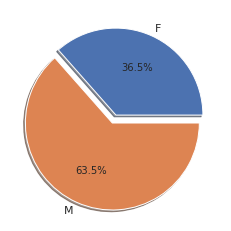

In [6]:
res = cohen.pivot_table(index=['sex'], aggfunc=['size'])

plot_pie = plt.pie(res['size'], labels=res.index, shadow=True, explode=[0,0.1], autopct='%1.1f%%')
plt.show(plot_pie)

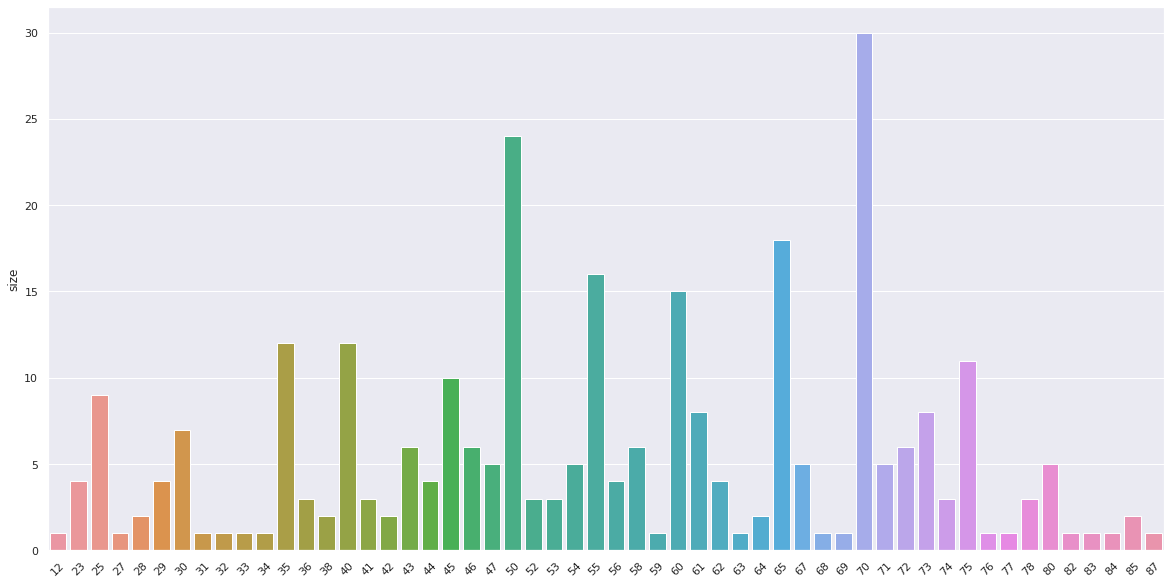

In [7]:
res = cohen.pivot_table(index=['age'], aggfunc=['size'])
plt.figure(figsize=(20,10))
plot_bar = sns.barplot(y=res['size'], x=res.index.astype(int))
plot_bar.set_xticklabels(plot_bar.get_xticklabels(), rotation=45)
plt.show(plot_bar)

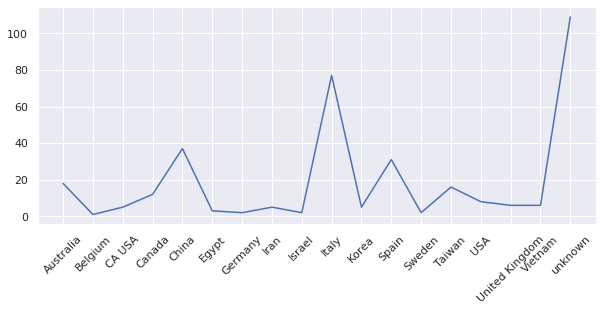

In [8]:
state=[]

for loc in cohen.location:
    if str(loc)!='nan':
        state.append(loc.split(',')[-1].strip())
    else:
        state.append('unknown')
    
cohen['state'] = state
num_states = [state.count(x) for x in set(state)]
name_state = [x for x in set(state)]
plt.figure(figsize=(10,4))
plot_line = sns.lineplot(x = name_state, y=num_states)
plt.xticks(rotation=45)
plt.show(plot_line)

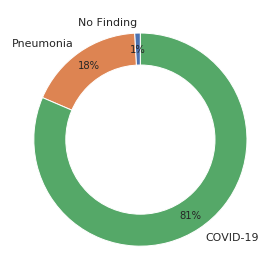

In [31]:
disiases=[]

for dis in cohen.finding:
    if dis=='No Finding':
        disiases.append(dis)
    elif dis.split(',')[0]=='COVID-19':
        disiases.append('COVID-19')
    else:
        disiases.append('Pneumonia')
        
name_dis = [x for x in set(disiases)]
num_dis = [disiases.count(x) for x in set(disiases)]
 
plt.pie(num_dis, labels=name_dis, autopct='%.f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.show()

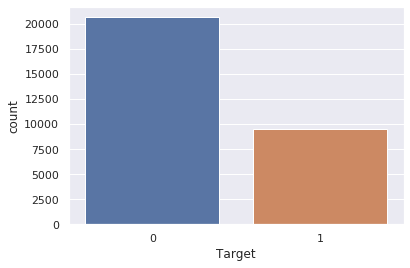

In [40]:
sns.countplot(rsna.Target)